In [356]:
import pandas as pd
import numpy as np

In [357]:
df = pd.read_csv("E:/Downloads/raw.githubusercontent.com_alexeygrigorev_datasets_master_housing.csv")

In [358]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

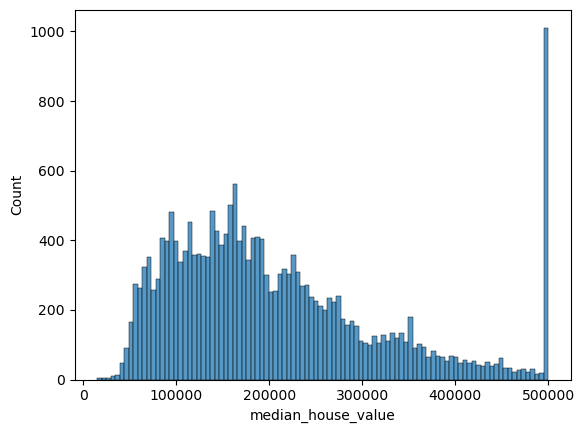

In [360]:
sns.histplot(df.median_house_value, bins=100);

median_house_value variable has a long tail.

In [361]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [362]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [363]:
df = df.drop(columns='ocean_proximity')

### Q1

In [364]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedrooms have null values

### Q2

In [365]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

Median of population = 1195

### Q3

In [366]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_test + n_val)

In [367]:
idx = np.arange(n)

In [368]:
np.random.seed(42)

In [369]:
np.random.shuffle(idx)

In [370]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [371]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
2,-121.85,37.25,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
3,-116.97,32.78,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
4,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0
...,...,...,...,...,...,...,...,...,...
3132,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
3133,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
3134,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
3135,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [372]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [373]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [374]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788
1,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402
2,-121.85,37.25,20.0,3773.0,624.0,1965.0,607.0,5.4939
3,-116.97,32.78,35.0,1113.0,236.0,681.0,246.0,2.9784
4,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107
...,...,...,...,...,...,...,...,...
3132,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923
3133,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504
3134,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875
3135,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250


### Missing values

#### Trying 0 for missing values

In [349]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [350]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [351]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [352]:
def prepare_X_0(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [353]:
X_train_0 = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred).round(2)
print(score)

0.34


#### Trying mean for missing values

In [354]:
def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [355]:
X_train_mean = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred).round(2)
print(score)

0.34


Both options are equally good

### Q4

In [375]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [376]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [377]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    
    print(r, w0, score)

0 -9.763249478233945 0.34
1e-06 -9.763228831251167 0.34
0.0001 -9.76118523564198 0.34
0.001 -9.742646249773415 0.34
0.01 -9.561056193060953 0.34
0.1 -8.05888976971745 0.34
1 -3.13315427858005 0.34
5 -0.8410867975089135 0.35
10 -0.4381172315736765 0.35


The smallest r with least RMSE is 0

### Q5

In [266]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [289]:
scores = []
for i in seeds:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_test + n_val)
    
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train + n_val]
    df_test = df.iloc[n_train + n_val:]
    
    idx = np.arange(n)
    
    np.random.seed(i)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    df_train.reset_index(drop=True)
    df_val.reset_index(drop=True)
    df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    df_train.reset_index(drop=True)
    df_val.reset_index(drop=True)
    df_test.reset_index(drop=True)
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(score)
    scores.append(score)
np.std(scores).round(3)

0.3377387160099887
0.33779993536623476
0.33842870067784475
0.3320049468304087
0.3394451862554301
0.3433819705284019
0.33853302117697903
0.34687476972826825
0.351273686596104
0.3341558266516778


0.005

Standard Deviation of all scores rounded off to the 3rd decimal is 0.005

### Q6

In [301]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_test + n_val)

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

r = 0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred).round(2)
score

0.33

RMSE on the test dataset with seed 9 is 0.33